Histogramas en Python

In [1]:
#import pandas as pd 
#import numpy as np 
#import matplotlib.pyplot as plt

Histogramas en Python Puro

In [2]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [15]:
def count_elements(seq) -> dict:
    """
    Funcion que cuenta las frecuencias de aparicion de      cada elemento de ka secuencia, creando un               diccionario comosi fuese una tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0)+1 #Con GET obtengo el objeto clave iesima dentro del histograma sino va a valer 0
    return hist


In [16]:
fAbs = count_elements(x) #Aca cuentas los elementos y cuantas veces aparecen Usa la FUNCION DE ARRIBA
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [17]:
from collections import Counter

In [18]:
fAbs2= Counter(x)

In [19]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [21]:
fAbs.items() == fAbs2.items() # me fijo si los dos tienen lo smismo valores 

True

In [22]:
def ascii_histogram(seq) -> None:
    """
        Un histograma de frecuencias absolutas
        colocado en horizontal y con caracteres ASCII
    """

    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [23]:
ascii_histogram(x)

0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [37]:
import random
random.seed(2019)

In [38]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [39]:
data =[]
for k, v in zip (vals, freqs):
    data.extend([k]*v)#añade el valor al array
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [42]:
ascii_histogram(data)

1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


 ## Histograma con NumPy

In [51]:
import numpy as np

In [52]:
np.random.seed(2019)

In [53]:
np.set_printoptions(precision=3)#redondeo a 3 decimales

In [55]:
x = np.random.laplace(loc=10, scale=3,size=1000) #Funcion Laplace

In [56]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [57]:
hist, bin_edges = np.histogram(x)

In [58]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9], dtype=int64)

In [59]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [61]:
hist.size, bin_edges.size

(10, 11)

In [62]:
min_edge = x.min()

In [63]:
max_edge = x.max()

In [65]:
n_bins = 10
bin_edges = np.linspace(start=min_edge, stop=max_edge,num=n_bins+1, endpoint=True) 

In [66]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [67]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [69]:
bcount = np.bincount(x) #Lee solo enteros y luego devuelve 1 porque hay un solo 0 3 porque hay 3 unos
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [71]:
hist, _ = np.histogram(x,range=(0, max(x)), bins=max(x)+1)

In [72]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [73]:
np.array_equal(bcount, hist)

True

In [74]:
dict(zip(np.unique(x),bcount[bcount.nonzero()]))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

## Visualizacion de Histogramas con matplotloib y Pandas

In [75]:
import matplotlib.pyplot as plt 
import pandas as pd

In [77]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3,size=1000) #Funcion Laplace

(0.0, 140.0)

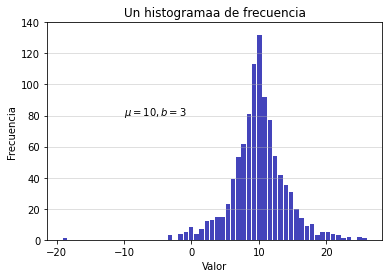

In [86]:
n, bins, patches = plt.hist(x = x, bins="auto", color="#0505a5", alpha = 0.75, rwidth= 0.85 )
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histogramaa de frecuencia")
plt.text(-10, 80,r'$\mu = 10, b=3$')
maxfreq=n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10)

In [82]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [83]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [84]:
patches

<a list of 58 Patch objects>

In [87]:
size, scale =1000, 10
data= pd.Series(np.random.gamma(scale,size=size))

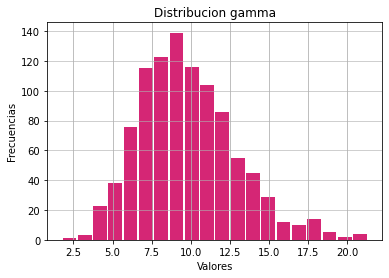

In [91]:
data.plot.hist(grid=True, bins= 20, rwidth= 0.9, color="#d52675")
plt.title("Distribucion gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis= "y",alpha=0.75)

## Funciones de Densidad y de probabilidad

In [92]:
mu = 10,20
sigma = 5,2
dist=pd.DataFrame(np.random.normal(loc=mu, scale=sigma, size=(1000,2)), columns=['x1', 'x2'])


In [95]:
dist.agg(['min','max','mean','std']).round(decimals=2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


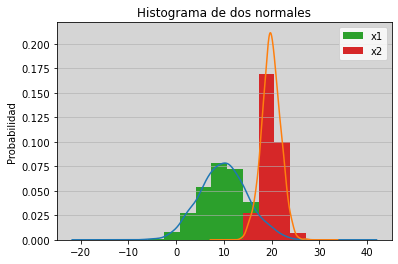

In [101]:
fig,ax=plt.subplots()
dist.plot.kde(ax=ax, legend=False, title="Histograma de dos normales")#Curvas
dist.plot.hist(density = True,ax=ax) #histograma
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha= 0.75)
ax.set_facecolor("#d5d5d5")

In [104]:
from scipy import stats

In [107]:
dist = stats.norm() #distribucin normal teorica N(0,1) ~ exp(-x**2/2)/sqrt(*pi)

In [108]:
sample= dist.rvs(size=1000)

In [111]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [112]:
stats.norm.ppf(0.99)

2.3263478740408408

In [118]:
x = np.linspace(start=stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99),num=250) # generacion de quantiles , minimo (0.01) max(0.99) con 250 numero en el medio

In [115]:
gkde = stats.gaussian_kde(dataset=sample)

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

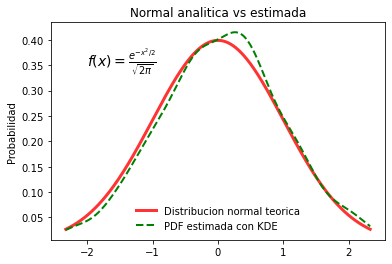

In [117]:
fig, ax = plt.subplots()
ax.plot(x,dist.pdf(x), linestyle="solid",c="red",lw=3,alpha=0.8,label="Distribucion normal teorica")
ax.plot(x, gkde.evaluate(x),linestyle="dashed",c="green",lw=2,label="PDF estimada con KDE")
ax.legend(loc="best", frameon=False)
ax.set_title("Normal analitica vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2.,0.35,r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize=14)

## Histogramas con Seaborn

In [121]:
import seaborn as sb

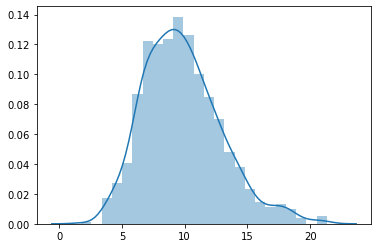

In [125]:
sb.distplot(data)

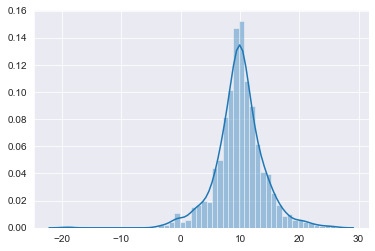

In [128]:
np.random.seed(2019)
x= np.random.laplace(loc=10, scale=3, size=1000)
sb.set_style("darkgrid")
sb.distplot(x)

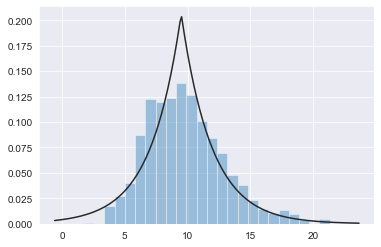

In [131]:
sb.distplot(data, fit=stats.laplace, kde=False)

## Otras formas 

In [133]:
data2 = np.random.choice(np.arange(10),size=10000,p=np.linspace(1,11,10)/60)

In [134]:
s = pd.Series(data2)

In [136]:
s.value_counts() #Frecuencias absolutas

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [135]:
s.value_counts(normalize=True) # frecuencias relativas absolutas

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [141]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,20,25,30,40,51,52])
bins= (0,10,15,18,21,np.inf)
labels = ('Infancia','Preadolecencia','Adolecencia', 'Universitario','Adulto')
groups = pd.cut(ages,bins=bins, labels=labels)
groups

0           Infancia
1           Infancia
2           Infancia
3           Infancia
4           Infancia
5           Infancia
6           Infancia
7           Infancia
8     Preadolecencia
9     Preadolecencia
10       Adolecencia
11       Adolecencia
12     Universitario
13            Adulto
14            Adulto
15            Adulto
16            Adulto
17            Adulto
dtype: category
Categories (5, object): [Infancia < Preadolecencia < Adolecencia < Universitario < Adulto]

In [142]:
groups.value_counts()

Infancia          8
Adulto            5
Adolecencia       2
Preadolecencia    2
Universitario     1
dtype: int64

In [145]:
pd.concat((ages,groups),axis=1).rename(columns={0:'age',1:'group'})

,age,group
0,1,Infancia
1,1,Infancia
2,3,Infancia
3,5,Infancia
4,6,Infancia
5,8,Infancia
6,9,Infancia
7,10,Infancia
8,12,Preadolecencia
9,15,Preadolecencia
